# HW4 6214500875 Pranpaveen

# My data sentiment analysis

In [1]:
'''!wget https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip; unzip master.zip
!mv wisesight-sentiment-master/kaggle-competition/* .
!pip install tensorflow_text
!pip install pythainlp
!pip install emoji
!ls'''

'!wget https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip; unzip master.zip\n!mv wisesight-sentiment-master/kaggle-competition/* .\n!pip install tensorflow_text\n!pip install pythainlp\n!pip install emoji\n!ls'

In [2]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from tqdm import tqdm_notebook
import re
import emoji
import matplotlib.pyplot as plt



In [3]:
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_rep(text):
    def _replace_rep(m):
        c,cc = m.groups()
        return f'{c}xxrep'
    re_rep = re.compile(r'(\S)(\1{2,})')
    return re_rep.sub(_replace_rep, text)

def ungroup_emoji(toks):
    res = []
    for tok in toks:
        if emoji.emoji_count(tok) == len(tok):
            for char in tok:
                res.append(char)
        else:
            res.append(tok)
    return res

def process_text(text):
    #pre rules
    res = text.lower().strip()
    res = replace_url(res)
    res = replace_rep(res)
    
    #tokenize
    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    
    #post rules
    res = ungroup_emoji(res)
    
    return res

## Read data

In [4]:
with open('train.txt') as f:
    texts = [line.strip() for line in f.readlines()]
f.close()
with open('train_label.txt') as f:
    categories = [line.strip() for line in f.readlines()]
f.close()
all_df = pd.DataFrame({'category':categories, 'texts':texts})
all_df.head()

,category,texts
0,neu,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ
1,neu,คะ
2,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค
3,neu,😅😅😅
4,neu,สวัสดีวันพุธ แนน อะไรนะ


In [5]:
all_df['processed'] = all_df.texts.map(lambda x: '|'.join(process_text(x)))
all_df['wc'] = all_df.processed.map(lambda x: len(x.split('|')))
all_df['uwc'] = all_df.processed.map(lambda x: len(set(x.split('|'))))
all_df.head()

,category,texts,processed,wc,uwc
0,neu,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,ประเทศ|เรา|ผลิต|และ|ส่งออก|ยาสูบ|เยอะ|สุด|ใน|โ...,13,13
1,neu,คะ,คะ,1,1
2,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค,อิ|เหี้ย|ออม|ทำ|กู|อยาก|กิน|เอ็ม|เค,9,9
3,neu,😅😅😅,😅|xxrep,2,2
4,neu,สวัสดีวันพุธ แนน อะไรนะ,สวัสดี|วัน|พุธ|แนน|อะไร|นะ,6,6


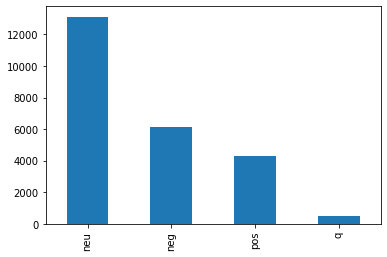

In [6]:
all_df.category.value_counts().plot.bar()

## ใช้แค่ neg(negative) & pos(posivive)

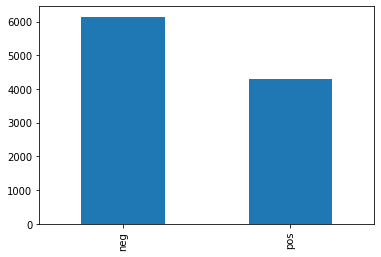

In [7]:
all_df = all_df[(all_df['category']=='neg') |  (all_df['category']=='pos') ]
all_df.category.value_counts().plot.bar()

In [111]:
all_df[all_df['category']=='neg'].head()

,category,texts,processed,wc,uwc
2,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค,อิ|เหี้ย|ออม|ทำ|กู|อยาก|กิน|เอ็ม|เค,9,9
6,neg,เน็ตควายมากกูพูดจริงเสียดายตังค์ที่ติดตั้งเน็ต...,เน็ต|ควาย|มาก|กู|พูด|จริง|เสียดาย|ตังค์|ที่|ติ...,126,89
8,neg,เหล้าเบลล์รสชาติเหี้ยสุด จะไม่แดกอีกละ,เหล้า|เบล|ล์|รสชาติ|เหี้ย|สุด|จะ|ไม่|แดก|อีก|ละ,11,11
11,neg,ลิปมันของเเบร์น Mistine ราคากลาง ๆ ไม่แพงมาก ร...,ลิป|มัน|ของ|เเบร์น|mistine|ราคา|กลาง|ๆ|ไม่|แพง...,18,17
12,neg,ทำไมมันไม่มีโปรให้เร๊าาาาาา,ทำไม|มัน|ไม่|มี|โปร|ให้|เร๊า|xxrep,8,8


In [112]:
all_df[all_df['category']=='pos'].head()

,category,texts,processed,wc,uwc
10,pos,สนใจ ฟอจูนเนอร์ สีขาวครับ,สนใจ|ฟอ|จูน|เนอ|ร์|สี|ขาว|ครับ,8,8
16,pos,ไปดิ..รอไร,ไป|ดิ|..รอ|ไร,4,4
19,pos,อยากกินบาบีก้อนหรอ555555,อยาก|กิน|บาบี|ก้อน|หรอ|5|xxrep,7,7
22,pos,ต้องไปลองกันนะ,ต้อง|ไป|ลอง|กัน|นะ,5,5
25,pos,ขอให้ SHEENe มีกิจการรุ่งเรือง ขายดีๆ ยอดไลท์เ...,ขอให้|sheene|มี|กิจการ|รุ่งเรือง|ขายดี|ๆ|ยอด|ไ...,27,22


In [8]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_df, test_size=0.15, random_state=1412)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [9]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [10]:
y_train = train_df['category']
y_valid = valid_df['category']
label_map = {'neg':0,'pos':1}
y_train = np.vectorize(label_map.get)(y_train)
y_valid = np.vectorize(label_map.get)(y_valid)

## Text feature extraction

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(tokenizer=process_text, ngram_range=(1,2), min_df=20, sublinear_tf=True)
tfidf_fit = tfidf.fit(all_df['texts'])
text_train = tfidf_fit.transform(train_df['texts'])
text_valid = tfidf_fit.transform(valid_df['texts'])

/home/ml-lab/anaconda3/envs/ptorch/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [15]:
text_train.shape , text_valid.shape

((8874, 1772), (1566, 1772))

In [16]:
x_train = text_train.toarray()
x_valid = text_valid.toarray()

In [22]:
class create_model():
    def __init__(self,hid_node = [10],in_features=2,activation=torch.nn.Sigmoid()):
        layers = []
        for i in range(len(hid_node)):
            if i == 0:
                layers.append(torch.nn.Linear(in_features=in_features,out_features=hid_node[i])) 
            else :
                layers.append(torch.nn.Linear(in_features=hid_node[i-1],out_features=hid_node[i]))
            layers.append(activation) 
        layers.append(torch.nn.Linear(in_features=hid_node[-1],out_features=1))
        layers.append(activation)
        self.model = torch.nn.Sequential(*layers).to(device)
        self.log_loss = []
        self.test_loss = []
        
    def predict(self,x):
        x = torch.Tensor(x).to(device)
        pred = self.model(x)
        pred = pred.reshape(-1)
        pred = (pred > 0.5).int().cpu().numpy()
        return pred
    def evaluate(self,x,y):
        x = torch.Tensor(x).to(device)
        y = torch.Tensor(y).to(device)
        pred = self.model(x)
        pred = pred.reshape(-1)
        pred = (pred > 0.5).int()
        return (pred == y).int().sum().cpu().numpy()/len(y)
    def train(self,x,y,epoch,opt,loss_fn = torch.nn.BCELoss(),lr=0.001 ,val_data = None):
        opt = opt(self.model.parameters(),lr=lr)
        x = torch.Tensor(x).to(device)
        y = torch.Tensor(y).to(device)
        ep_bar = tqdm(total=epoch, desc='Epoch')
        if val_data is not None :
            x_val = torch.Tensor(val_data[0]).to(device)
            y_val = torch.Tensor(val_data[1]).to(device)
        for i in range(epoch):
            pred = self.model(x)
            pred = pred.reshape(-1)
            opt.zero_grad()
            loss = loss_fn(pred,y)
            loss.backward()
            opt.step()
            self.log_loss.append(loss.item())
            if val_data is not None :
                self.test_loss.append(loss_fn(self.model(x_val).reshape(-1),y_val))
            ep_bar.set_postfix({'Loss':+loss.item()})
            ep_bar.update(1)

In [18]:
from tqdm.notebook import tqdm

# 1 Neural Network Classifier แบบ 1 Hidden Layer
## 1.1 ทดลองปรับค่าจํานวน Node ใน Hidden Layer จากน้อยไปมาก แล้ววิเคราะห์ผลการ Training

### 1 Node

accuracy 0.8352490421455939


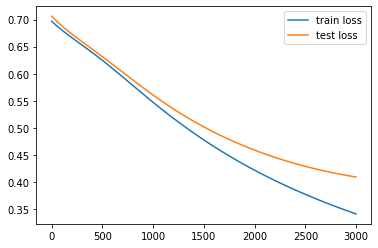

In [29]:
model = create_model([1],in_features=x_train.shape[1]) #1 Node
model.train(x_train,y_train,epoch=3000,opt=torch.optim.Adam,loss_fn=torch.nn.functional.binary_cross_entropy
            , lr=0.001,val_data=(x_valid,y_valid))
print('accuracy',model.evaluate(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
plt.legend(['train loss','test loss'])

### 2 Node

accuracy 0.8416347381864623


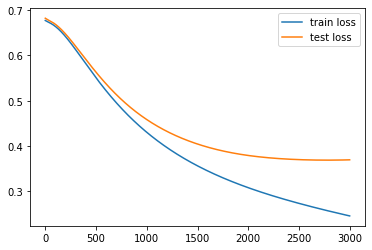

In [28]:
model = create_model([2],in_features=x_train.shape[1]) #2 Node
model.train(x_train,y_train,epoch=3000,opt=torch.optim.Adam,loss_fn=torch.nn.functional.binary_cross_entropy
            , lr=0.001,val_data=(x_valid,y_valid))
print('accuracy',model.evaluate(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
plt.legend(['train loss','test loss'])

### 4 Node

accuracy 0.8422733077905492


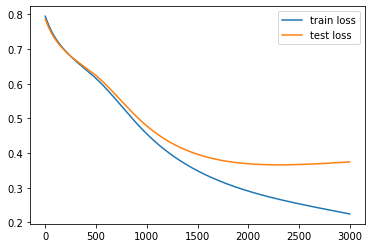

In [25]:
model = create_model([4],in_features=x_train.shape[1]) #4 Node
model.train(x_train,y_train,epoch=3000,opt=torch.optim.Adam,loss_fn=torch.nn.BCELoss() , 
            lr=0.001,val_data=(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
print('accuracy',model.evaluate(x_valid,y_valid))
plt.legend(['train loss','test loss'])

### 6 Node

accuracy 0.8409961685823755


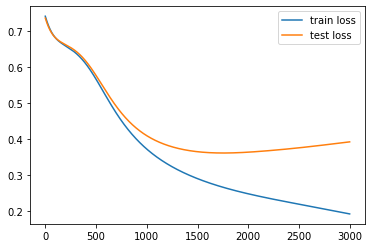

In [26]:
model = create_model([6],in_features=x_train.shape[1]) #6 Node
model.train(x_train,y_train,epoch=3000,opt=torch.optim.Adam,loss_fn=torch.nn.BCELoss() , 
            lr=0.001,val_data=(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
print('accuracy',model.evaluate(x_valid,y_valid))
plt.legend(['train loss','test loss'])

### 10 Node

accuracy 0.834610472541507


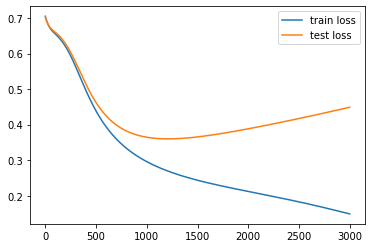

In [27]:
model = create_model([10],in_features=x_train.shape[1]) #10 Node
model.train(x_train,y_train,epoch=3000,opt=torch.optim.Adam,loss_fn=torch.nn.BCELoss() , 
            lr=0.001,val_data=(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
print('accuracy',model.evaluate(x_valid,y_valid))
plt.legend(['train loss','test loss'])

### สรุป การกำหนด Node น้อยเกินไปจะทำให้ Model underfit แต่การกำหนด Node มากเกินไปจะทำให้ Model เข้าสู่ Overfit มาก

## 1.2. ทดลองปรับค่า Learning Rate จากน้อยไปมาก แล้ววิเคราะห์ผลการ Training

Use 4 Node

### Learning Rate = 0.1

accuracy 0.8256704980842912


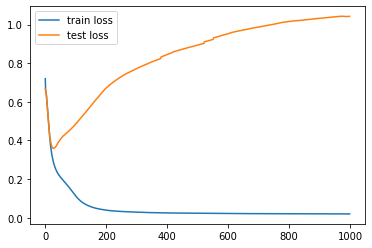

In [36]:
model = create_model([4],in_features=x_train.shape[1]) #4 Node
model.train(x_train,y_train,epoch=1000,opt=torch.optim.Adam,loss_fn=torch.nn.BCELoss() , 
            lr=0.1,val_data=(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
print('accuracy',model.evaluate(x_valid,y_valid))
plt.legend(['train loss','test loss'])

### Learning Rate = 0.01

accuracy 0.8301404853128991


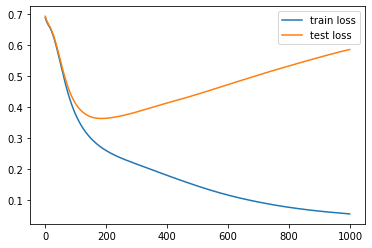

In [37]:
model = create_model([4],in_features=x_train.shape[1]) #4 Node
model.train(x_train,y_train,epoch=1000,opt=torch.optim.Adam,loss_fn=torch.nn.BCELoss() , 
            lr=0.01,val_data=(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
print('accuracy',model.evaluate(x_valid,y_valid))
plt.legend(['train loss','test loss'])

### Learning Rate = 0.001

accuracy 0.8409961685823755


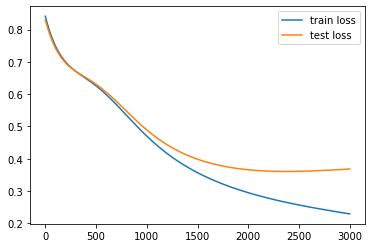

In [38]:
model = create_model([4],in_features=x_train.shape[1]) #4 Node
model.train(x_train,y_train,epoch=3000,opt=torch.optim.Adam,loss_fn=torch.nn.BCELoss() , 
            lr=0.001,val_data=(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
print('accuracy',model.evaluate(x_valid,y_valid))
plt.legend(['train loss','test loss'])

### Learning Rate = 0.0001

accuracy 0.8365261813537676


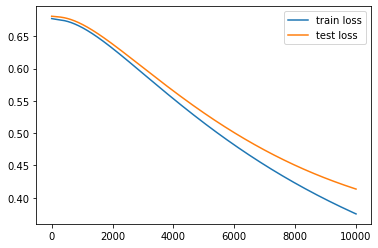

In [34]:
model = create_model([4],in_features=x_train.shape[1]) #4 Node
model.train(x_train,y_train,epoch=10000,opt=torch.optim.Adam,loss_fn=torch.nn.BCELoss() , 
            lr=0.0001,val_data=(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
print('accuracy',model.evaluate(x_valid,y_valid))
plt.legend(['train loss','test loss'])

### Learning Rate = 0.00001

accuracy 0.4220945083014049


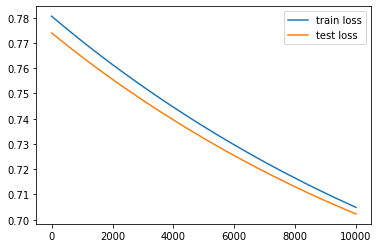

In [35]:
model = create_model([4],in_features=x_train.shape[1]) #4 Node
model.train(x_train,y_train,epoch=10000,opt=torch.optim.Adam,loss_fn=torch.nn.BCELoss() , 
            lr=0.00001,val_data=(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
print('accuracy',model.evaluate(x_valid,y_valid))
plt.legend(['train loss','test loss'])

### สรุป การกำหนด Learning rate น้อยเกินไปทำให้  Model เข้าสู่ Optimum point ช้า แต่การกำหนดมากเกินไปก็ทำให้ไปไม่ถึงและเข้าสู่ overfit ไว
 

## 1.3. ทดลองการ Random Initial weight หรือทดลองการกําหนดให้ Initial Weight มีค่าคงที่ ให้ผลแตกต่างกันอย่างไร

### Weight , Bias = 0

In [106]:
model = create_model([4],in_features=x_train.shape[1]) #4 Node

In [107]:
model.model[0].weight

Parameter containing:
tensor([[-0.0201, -0.0147,  0.0126,  ...,  0.0191,  0.0182, -0.0099],
        [-0.0026, -0.0099, -0.0024,  ...,  0.0029, -0.0074, -0.0077],
        [-0.0011, -0.0206, -0.0084,  ..., -0.0131,  0.0073,  0.0120],
        [ 0.0011, -0.0063, -0.0231,  ..., -0.0036,  0.0225, -0.0052]],
       device='cuda:0', requires_grad=True)

In [108]:
model.model[0].bias

Parameter containing:
tensor([ 0.0043, -0.0021, -0.0162, -0.0154], device='cuda:0',
       requires_grad=True)

In [109]:
model.model[0].weight = torch.nn.Parameter(torch.zeros_like(model.model[0].weight))
model.model[0].bias = torch.nn.Parameter(torch.zeros_like(model.model[0].bias))
model.model[2].weight = torch.nn.Parameter(torch.zeros_like(model.model[2].weight))
model.model[2].bias = torch.nn.Parameter(torch.zeros_like(model.model[2].bias))

accuracy 0.8352490421455939


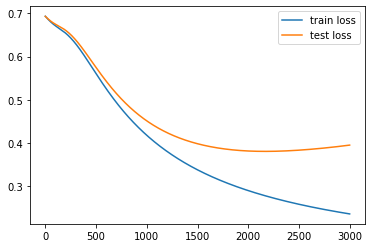

In [110]:
model.train(x_train,y_train,epoch=3000,opt=torch.optim.Adam,loss_fn=torch.nn.BCELoss() , 
            lr=0.001,val_data=(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
print('accuracy',model.evaluate(x_valid,y_valid))
plt.legend(['train loss','test loss'])

### Weight , Bias = 1

In [98]:
model = create_model([4],in_features=x_train.shape[1]) #4 Node
model.model[0].weight = torch.nn.Parameter(torch.ones_like(model.model[0].weight))
model.model[0].bias = torch.nn.Parameter(torch.ones_like(model.model[0].bias))
model.model[2].weight = torch.nn.Parameter(torch.ones_like(model.model[2].weight))
model.model[2].bias = torch.nn.Parameter(torch.ones_like(model.model[2].bias))

accuracy 0.8314176245210728


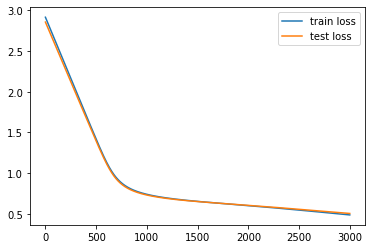

In [99]:
model.train(x_train,y_train,epoch=3000,opt=torch.optim.Adam,loss_fn=torch.nn.BCELoss() , 
            lr=0.001,val_data=(x_valid,y_valid))
# plot loss vs epoch
plt.plot(model.log_loss)
plt.plot(model.test_loss)
print('accuracy',model.evaluate(x_valid,y_valid))
plt.legend(['train loss','test loss'])

### สรุป การกำหนด Initial weight มีผลต่อการลู่เข้าสู่ optimum point

# 2 ทดลองสร้าง Neural Network Classifier โดยใช้ Training Data ทั้ง 4 แบบ (Gaussian, XOR, Circular, and Spiral Distributions) ที่ได้ทําไว้ในการบ้านครั้งที่ 2 และ 3 การทดสอบ Neural Network Classifier ใช้ข้อมูลจาก Testing Data ในการทดสอบวัดผลเพื่อหาค่า Classification Error ให้ Plot ผลจากการ Classify โดยใช้ 4 สี เหมือนการบ้านที่ 3 และให้ให้ Plot decision boundary ของแต่ละกรณี

In [113]:
!wget https://raw.githubusercontent.com/layel2/pattern-course-ku/main/datagen.py

--2020-10-21 10:51:31--  https://raw.githubusercontent.com/layel2/pattern-course-ku/main/datagen.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3967 (3.9K) [text/plain]
Saving to: ‘datagen.py’

datagen.py          100%[===================>]   3.87K  --.-KB/s    in 0s      

2020-10-21 10:51:31 (25.4 MB/s) - ‘datagen.py’ saved [3967/3967]



In [114]:
class model_kernel():
    def __init__(self,base_model,kenel):
        self.model = base_model
        self.kenel = kenel
    def predict(self,x):
        x = self.kenel(x)
        
        return self.model.predict(x)

In [115]:
def hw_pipe(x,y,hid_node=[5],epoch=200,kernel=None):
    #split data
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.5)
    #plot
    datagen.myplot(x,y,'Data')
    #model
    if kernel is not None :
        xtrain = kernel(xtrain)
        model = create_model(hid_node,in_features=xtrain.shape[1])
        model.train(xtrain,ytrain,epoch=epoch,opt=torch.optim.Adam,loss_fn=torch.nn.MSELoss())
        pred = model.predict(kernel(xtest))
        print("Accuracy : ",sum(pred==ytest)/len(ytest))
        model_k = model_kernel(model,kernel)
        datagen.pred_plot(xtest,ytest,pred)
        datagen.plot_decisionBoundary(model_k,xtest,ytest)
    else :
        model = create_model(hid_node)
        model.train(xtrain,ytrain,epoch=epoch,opt=torch.optim.Adam,loss_fn=torch.nn.MSELoss())
        pred = model.predict(xtest)
        print("Accuracy : ",sum(pred==ytest)/len(ytest))
        datagen.pred_plot(xtest,ytest,pred)
        datagen.plot_decisionBoundary(model,xtest,ytest)
    

In [117]:
import datagen

## 2.1 Gaussian

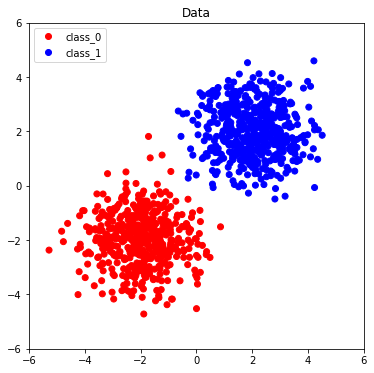

Accuracy :  0.996



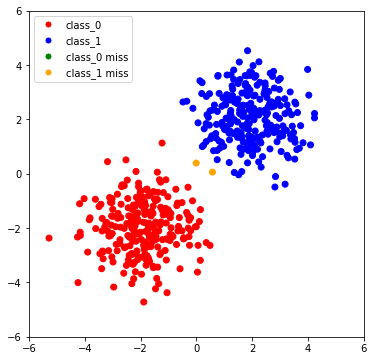

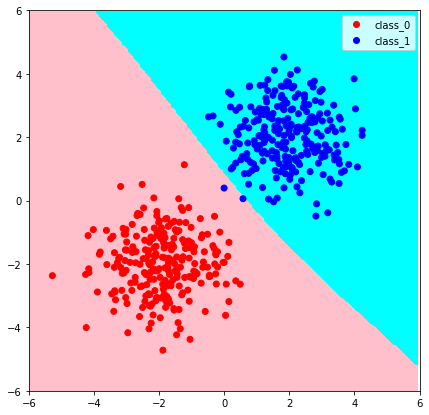

In [118]:
x,y = datagen.gaussian()
hw_pipe(x,y)

## 2.2 Circular

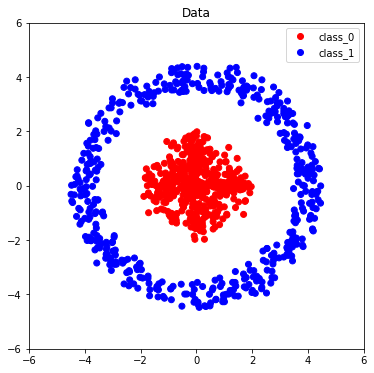

Accuracy :  1.0



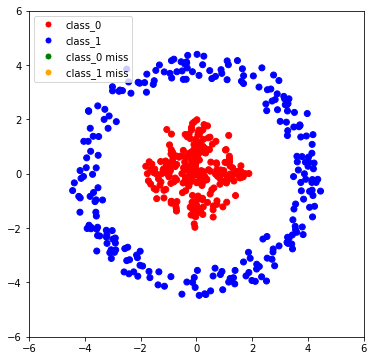

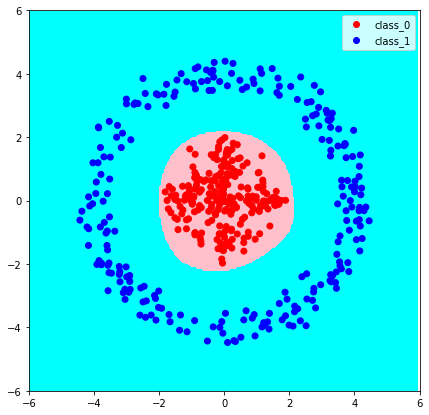

In [119]:
x,y = datagen.circular()
hw_pipe(x,y,hid_node=[10],epoch=1000)

## 2.3 XOR

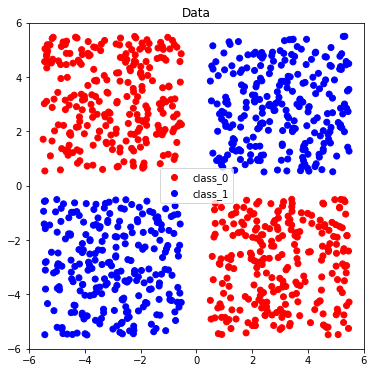

Accuracy :  0.988



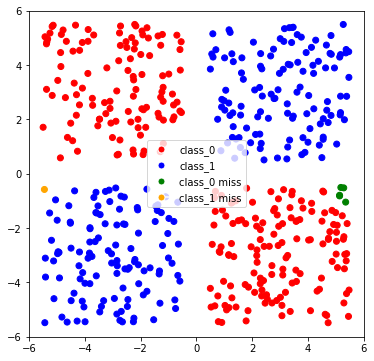

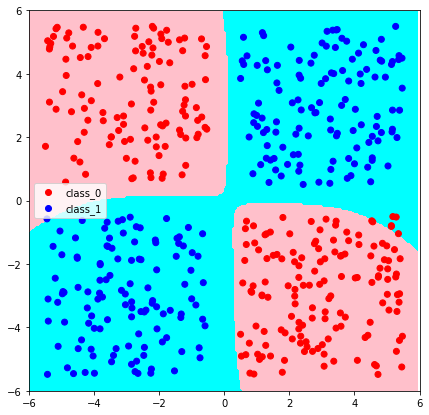

In [120]:
x,y = datagen.xor()
hw_pipe(x,y,hid_node=[10],epoch=1000)

## 2.4 Spiral

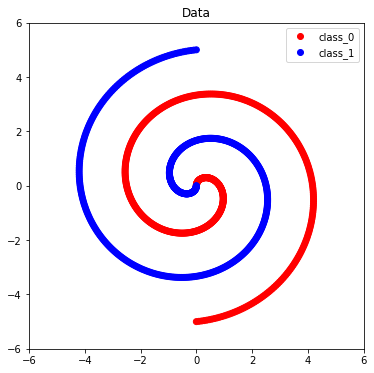

Accuracy :  0.66



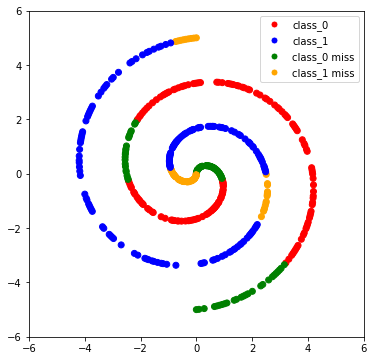

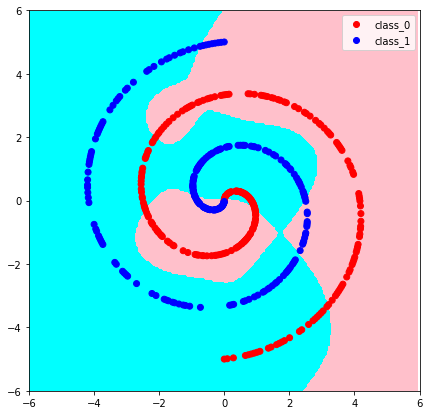

In [124]:
x,y = datagen.spiral()
def kernel_sine(x):
    return np.c_[x,np.sin(x)]
hw_pipe(x,y,hid_node=[10],epoch=1000,kernel=kernel_sine)

เพิ่มเป็น 2 hidden layers

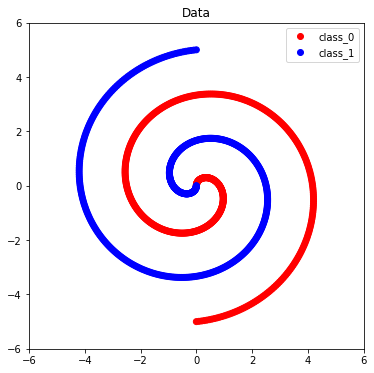

Accuracy :  0.934



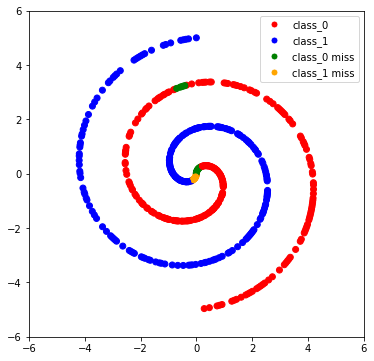

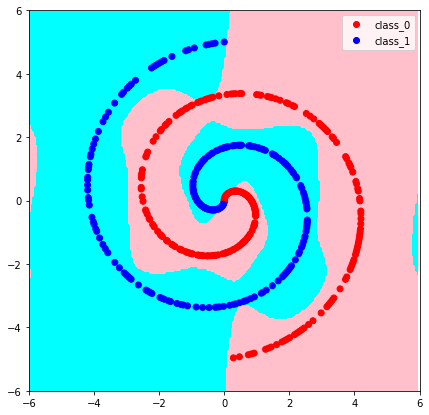

In [126]:
hw_pipe(x,y,hid_node=[10,10],epoch=1000,kernel=kernel_sine)